# MSIS 2508 Final Project
Team Members:
1. Lisa Patel
2. Pratiksha Rawal
3. Mukesh Ganesh
4. Ailene Nguyen
5. Vishakha Srivastava

## Introduction
Our group will be doing Natural Language Processing on a New York Times Kaggle dataset. Our project will be split into multiple different parts for us to explore different areas of NLP:

- **Part 1: EDA on Articles and Comments**
- **Part 2: Sentiment Analysis**
- **Part 3: Predicting NYT's Pick**
- **Part 4: Text Summarization**
- **Part 5: Auto-Text Generation**

<img src="https://i1.wp.com/canopylab.com/wp-content/uploads/2019/11/shutterstock_1455391502-2.jpg?ssl=1" width="800"/>

## Problem Statement
There are multiple problems our group ahs identified and would liek to address. Firest, there is simply too much textual data out there, so we would like to design a model to summarize large bodies of text. Second, textual data has a huge influence on society, so we would like to analyze the general sentiment of users. Finally, we are interested in predicting future words or statements that users intend to say, and we plan to do this with by creating a model to automatically geenrate text. 

## Dataset
The dataset we will be using contains New York Times articles and comments from January to May 2017 and January to April 2018. The data is split into two part for each month: comments and articles. The comments data contains over 2 million comments with 34 features and the articles data contains over 9,000 articles with 16 features. 

<img src="https://theme.zdassets.com/theme_assets/968999/3f343ffc604a6c839e31d3f052b78abfa34ab588.png" width="800"/>

## Data Dictionary for Article Data

- **articleID**: the ID of the article
- **abstract**: a short summary of the text
- **byline**: the author
- **documentType**: the type of document
- **headline**: the title of the article
- **keywords**: the key topics in the article
- **multimedia**: whether or not the article has multiple media forms
- **newDesk**: the desk of the article
- **printPage**: the number of pages for print
- **pubDate**: the date of publication
- **sectionName**: the section of the article 
- **snippet**: a short snippet from the article
- **source**: where the article is from
- **typeOfMaterial**: the article type
- **webURL**: the URL of the article
- **articleWordCount**: the number of words in the article


## Data Dictionary for Comments Data

- **approveDate**: the date the comment was approved
- **commentBody**: the body of the comment
- **commentID**: the ID of the comment
- **commentSequence**: a sequence of numbers associated with the comment
- **commentTitle**: the title of the comment
- **commentType**: the type of comment (i.e. comment or reply)
- **createDate**: the date the comment was created
- **depth**: the depth of the comment
- **editorsSelection**: whether or not the comemnt was the editors selection
- **parentID**: the ID of the parent comment
- **parentUserDisplayName**: the user name of the parent comment
- **permID**: the complete ID of the comment
- **picURL**: the URL to the comment picture
- **recommendations**: the number of recommendations the comment received
- **recommendedFlag**: a flag icon for recommending a comment
- **replyCount**: the number of replies a comment received
- **reportAbuseFlag**: a flag icon for reporting abuse
- **sharing**: whether or not the comment was shared
- **status**: the state of the comment
- **timespeople**: if the comment was by an NYT person or not
- **trusted**: if the comment is trusted or not
- **updateDate**: the date the comment was last updated
- **userDisplayName**: the user name
- **userID**: the ID of the user who posted the comment
- **userLocation**: the location of the user 
- **userTitle**: the title of the user
- **userURL**: the URL of the user
- **inReplyTo**: the comment that the reply was to 
- **articleID**: the ID of the article
- **sectionName**: the section of the article
- **newDesk**: the desk of the article
- **articleWordCount**: the number of words in the article
- **printPage**: the number of pages for print
- **typeOfMaterial**: the article type

# Part 1: EDA on NYT Articles and Comments
Exploratory data analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often with visual methods. EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. 

<img src="https://cdn.educba.com/academy/wp-content/uploads/2020/01/exploratory-data-analysis.jpg" width="800"/>

In this jupyter notebook, we plan to do a bit of data cleaning and conduct our Exploratory Data Analysis of NYT articles and comments through visualizations using matplotlib and WordCloud.

## 1.1 EDA on Articles

The original dataset did not contain the text of the NYT articles. A separate jupyter file was created to scrape the text from the articles using the webURLs already contained in the dataset. "ArticlesText.csv" is a csv file our team created to contain every single NTY article along with its text.

In [1]:
import pandas as pd
df_articles = pd.read_csv("ArticlesText.csv")

In [2]:
df_articles.head()

articleID                  byline documentType  \
0  58691a5795d0e039260788b9  By JENNIFER STEINHAUER      article   
1  586967bf95d0e03926078915         By MARK LANDLER      article   
2  58698a1095d0e0392607894a     By CAITLIN LOVINGER      article   
3  5869911a95d0e0392607894e       By JOCHEN BITTNER      article   
4  5869a61795d0e03926078962          By JIAYIN SHEN      article   

                                            headline  \
0   G.O.P. Leadership Poised to Topple Obama’s Pi...   
1  Fractured World Tested the Hope of a Young Pre...   
2                               Little Troublemakers   
3                Angela Merkel, Russia’s Next Target   
4                      Boots for a Stranger on a Bus   

                                            keywords  multimedia   newDesk  \
0  ['United States Politics and Government', 'Law...           1  National   
1  ['Obama, Barack', 'Afghanistan', 'United State...           1   Foreign   
2  ['Crossword Puzzles', 'Boxing Day', 'Holidays ...           1     Games   
3  ['Cyberwarfare and Defense', 'Presidential Ele...           1      OpEd   
4      ['Shoes and Boots', 'Buses', 'New York City']           0     Metro   

   printPage              pubDate   sectionName  \
0          1  2017-01-01 15:03:38      Politics   
1          1  2017-01-01 20:34:00  Asia Pacific   
2          0  2017-01-01 23:00:24       Unknown   
3         15  2017-01-01 23:30:27       Unknown   
4         12  2017-01-02 01:00:02       Unknown   

                                             snippet              source  \
0  The most powerful and ambitious Republican-led...  The New York Times   
1  A strategy that went from a “good war” to the ...  The New York Times   
2            Chuck Deodene puts us in a bubbly mood.  The New York Times   
3  With a friend entering the White House, Vladim...  The New York Times   
4    Witnessing an act of generosity on a rainy day.  The New York Times   

  typeOfMaterial                                             webURL  \
0           News  https://www.nytimes.com/2017/01/01/us/politics...   
1           News  https://www.nytimes.com/2017/01/01/world/asia/...   
2           News  https://www.nytimes.com/2017/01/01/crosswords/...   
3          Op-Ed  https://www.nytimes.com/2017/01/01/opinion/ang...   
4          Brief  https://www.nytimes.com/2017/01/01/nyregion/me...   

   articleWordCount                                               text  
0              1324  With New Congress Poised to Convene, Obama’s P...  
1              2836  The Afghan War and the Evolution of Obama - Th...  
2               445  Little Troublemakers - The New York Times\nSec...  
3               864  Opinion | Angela Merkel, Russia’s Next Target ...  
4               309  Boots for a Stranger on a Bus - The New York T...

In [3]:
df_articles.shape

(9172, 16)

## 1.1.1 Data Cleaning
The data is cleaned using the regular expression library. The function cleans out any chaarcters that are not alphabetical. 

In [4]:
# before test
test_before_clean = df_articles['text'][0]

In [5]:
# function defined to clean the data and remove any characters that are not a-z
import re

def clean_text_data(text):
    text = text.lower()
    text = re.sub("[^a-z ]+", "", text)
    return text

In [6]:
# applying the cleaning function to the text column of the data
df_articles['text'] = df_articles['text'].apply(clean_text_data)

In [7]:
# after test
test_after_clean = df_articles['text'][0]

In [8]:
# printing results of the before and after
print("Before cleaning: \n{}\n".format(test_before_clean))
print("After cleaning: \n{}\n".format(test_after_clean))

Before cleaning: 
With New Congress Poised to Convene, Obama’s Policies Are in Peril - The New York Times
SectionsSEARCHSkip to contentSkip to site indexPoliticsToday’s PaperPolitics|With New Congress Poised to Convene, Obama’s Policies Are in Perilhttps://nyti.ms/2iT3jXLAdvertisementContinue reading the main storySupported byContinue reading the main storyWith New Congress Poised to Convene, Obama’s Policies Are in PerilSenator Mitch McConnell of Kentucky, the majority leader, last month. The new Congress will convene on Tuesday.Credit...Mark Wilson/Getty ImagesBy Jennifer SteinhauerJan. 1, 2017WASHINGTON — The most powerful and ambitious Republican-led Congress in 20 years will convene Tuesday, with plans to leave its mark on virtually every facet of American life — refashioning the country’s social safety net, wiping out scores of labor and environmental regulations and unraveling some of the most significant policy prescriptions put forward by the Obama administration.Even before P

In [9]:
# comparing article word count column with scraped text word count 
test = df_articles['text'][0]
print("Word count of article is: {}".format(df_articles['articleWordCount'][0]))
print("Word count of text scraped is: {}".format(len(test.split())))

test1 = df_articles['text'][1]
print("Word count of article is: {}".format(df_articles['articleWordCount'][1]))
print("Word count of text scraped is: {}".format(len(test1.split())))      

test2 = df_articles['text'][2]
print("Word count of article is: {}".format(df_articles['articleWordCount'][2]))
print("Word count of text scraped is: {}".format(len(test2.split())))   

Word count of article is: 1324
Word count of text scraped is: 1373
Word count of article is: 2836
Word count of text scraped is: 3043
Word count of article is: 445
Word count of text scraped is: 514


## 1.1.2 Visualization
A wordCloud is created for all of the New York Times articles in the dataset. Since we wanted to narrow down our analysis a bit more, we went on to visualize categories to group the articles in. 

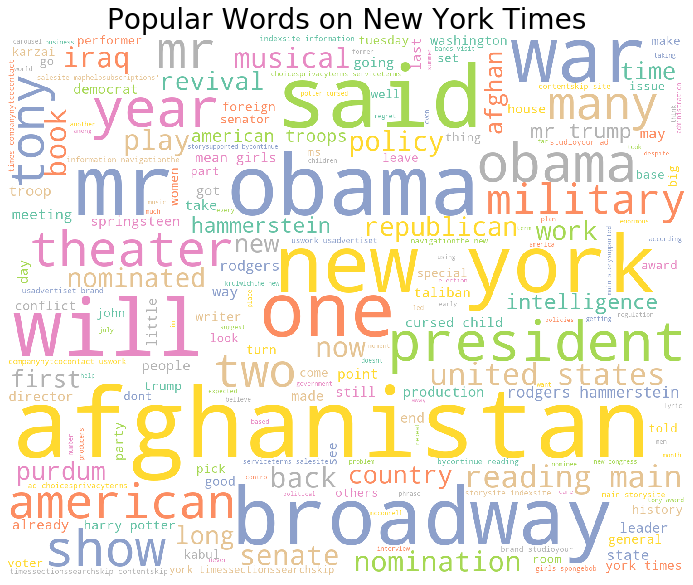

In [11]:
# general word cloud of all the textual data

import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(15,10))
wc = WordCloud(width=1500, height=1200, 
               background_color='white', colormap='Set2')
wc.generate(str(df_articles['text'].values))
plt.title('Popular Words on New York Times', fontsize=28)
plt.imshow(wc)
plt.axis('off')
plt.show()

### Visualizing sectionName
The distribution of values in sectionName are very skewed, with a morjity of the values in an "Unknown" category. This is less desirable for our analysis.

In [12]:
import seaborn as sns

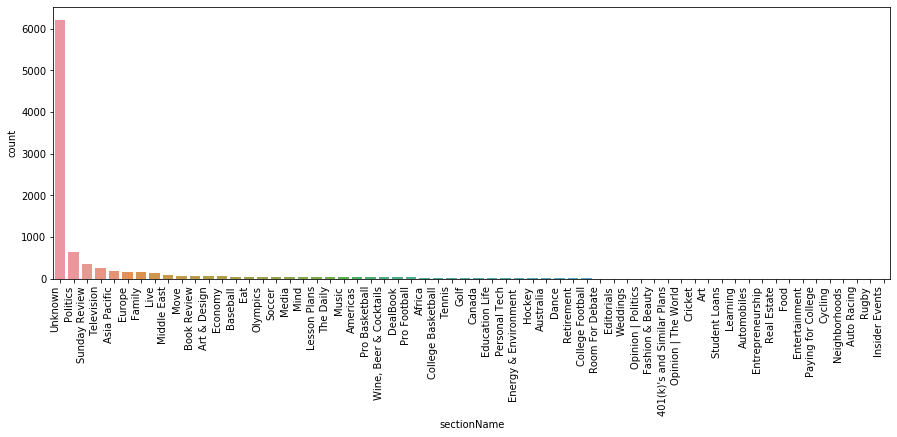

In [13]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='sectionName', data=df_articles, 
                   order = df_articles['sectionName'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

The sectionName produces an undesirable distribution, with a majority of the articles in the Unknown category.

In [14]:
df_articles['sectionName'].value_counts().nlargest(10)

Unknown          6217
Politics          638
Sunday Review     353
Television        261
Asia Pacific      174
Europe            172
Family            166
Live              138
Middle East        89
Move               61
Name: sectionName, dtype: int64

### Visualizing newDesk
The newDesk category has a better distribution than sectionName, wiht a majority of its articles in "OpEd", whihc is basically opinionated journalism. Since the distribution looks better for newDesk, we will group the articles by newDesk for further analysis.

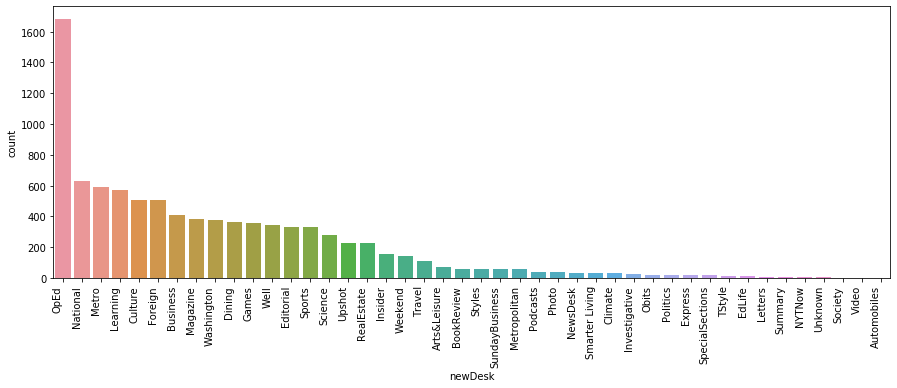

In [15]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='newDesk', data=df_articles, 
                   order = df_articles['newDesk'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

Since the distribution of newDesk is more even, newDesk will be used for EDA.

In [16]:
df_articles['newDesk'].value_counts().nlargest(10)

OpEd          1681
National       630
Metro          593
Learning       575
Culture        507
Foreign        507
Business       407
Magazine       386
Washington     378
Dining         366
Name: newDesk, dtype: int64

## 1.1.3 Analysis
The following cells group together the text by newDesk, joining all the articles for each desk to create a corpus. A WordCloud is then generated for each desk, with sklearn's feature extraction text submodule's English stop words.

In [17]:
# creates a corpus by combining all the text grouped by newDesk

df_articles_newDesk = df_articles.groupby(['newDesk'])['text'].apply(lambda x: ' '.join(x)).reset_index()
df_articles_newDesk = df_articles_newDesk.set_index('newDesk')
df_articles_newDesk

text
newDesk                                                           
Arts&Leisure      ways girls changed television or didnt  the n...
Automobiles      opinion  when flamethrowers like ann coulter c...
BookReview       is it possible for a writer to be objective  t...
Business         megyn kellys jump to nbc from fox news will te...
Climate          americans are staying home more thats saving e...
Culture          the affair season  episode  noah goes home  th...
Dining           swedish meatballs from the comfort of home  th...
EdLife           wanted factory workers degree required  the ne...
Editorial        opinion  why corporations are helping donald t...
Express          michigan state president lou anna simon resign...
Foreign          the afghan war and the evolution of obama  the...
Games            little troublemakers  the new york timessectio...
Insider            news not nausea  the new york timessectionss...
Investigative    scott pruitt before the epa fancy homes a shel...
Learning         winter comforts  the new york timessectionssea...
Letters          opinion  invitation to a dialogue being muslim...
Magazine         one mans quest to change the way we die  the n...
Metro            boots for a stranger on a bus  the new york ti...
Metropolitan     the lost footage of marilyn monroe  the new yo...
NYTNow           neither black nor white in the mississippi del...
National         with new congress poised to convene obamas pol...
NewsDesk         a playful headline confusion ensues an editor ...
Obits            ingvar kamprad founder of ikea and creator of ...
OpEd             opinion  angela merkel russias next target  th...
Photo            honoring black artists in light and shadow the...
Podcasts         the daily making sense of the gorsuch pick  th...
Politics         what are your hopes for trumps presidency  the...
RealEstate        year of the renter  the new york timessection...
Science          an inspiring story of weight loss and its afte...
Smarter Living   the  steps to turning setbacks into advantages...
Society           questions to ask before getting a divorce  th...
SpecialSections  how big do you want your nest egg to be  the n...
Sports           in navajo nation a basketball elder earns resp...
Styles           rules for social media created by kids  the ne...
Summary          things no reader should have to see  the new y...
SundayBusiness   the major potential impact of a corporate tax ...
TStyle           our favorite images from the paris mens shows ...
Travel           where i live washington dc  the new york times...
Unknown          apples corporate responsibility for distracted...
Upshot           cold therapy maybe better save your money  the...
Video            what comes after the media men list a lot of h...
Washington       as deficit soars toward  trillion congress shr...
Weekend          review what if until death do us part means a ...
Well             the japanese art of grieving a miscarriage  th...

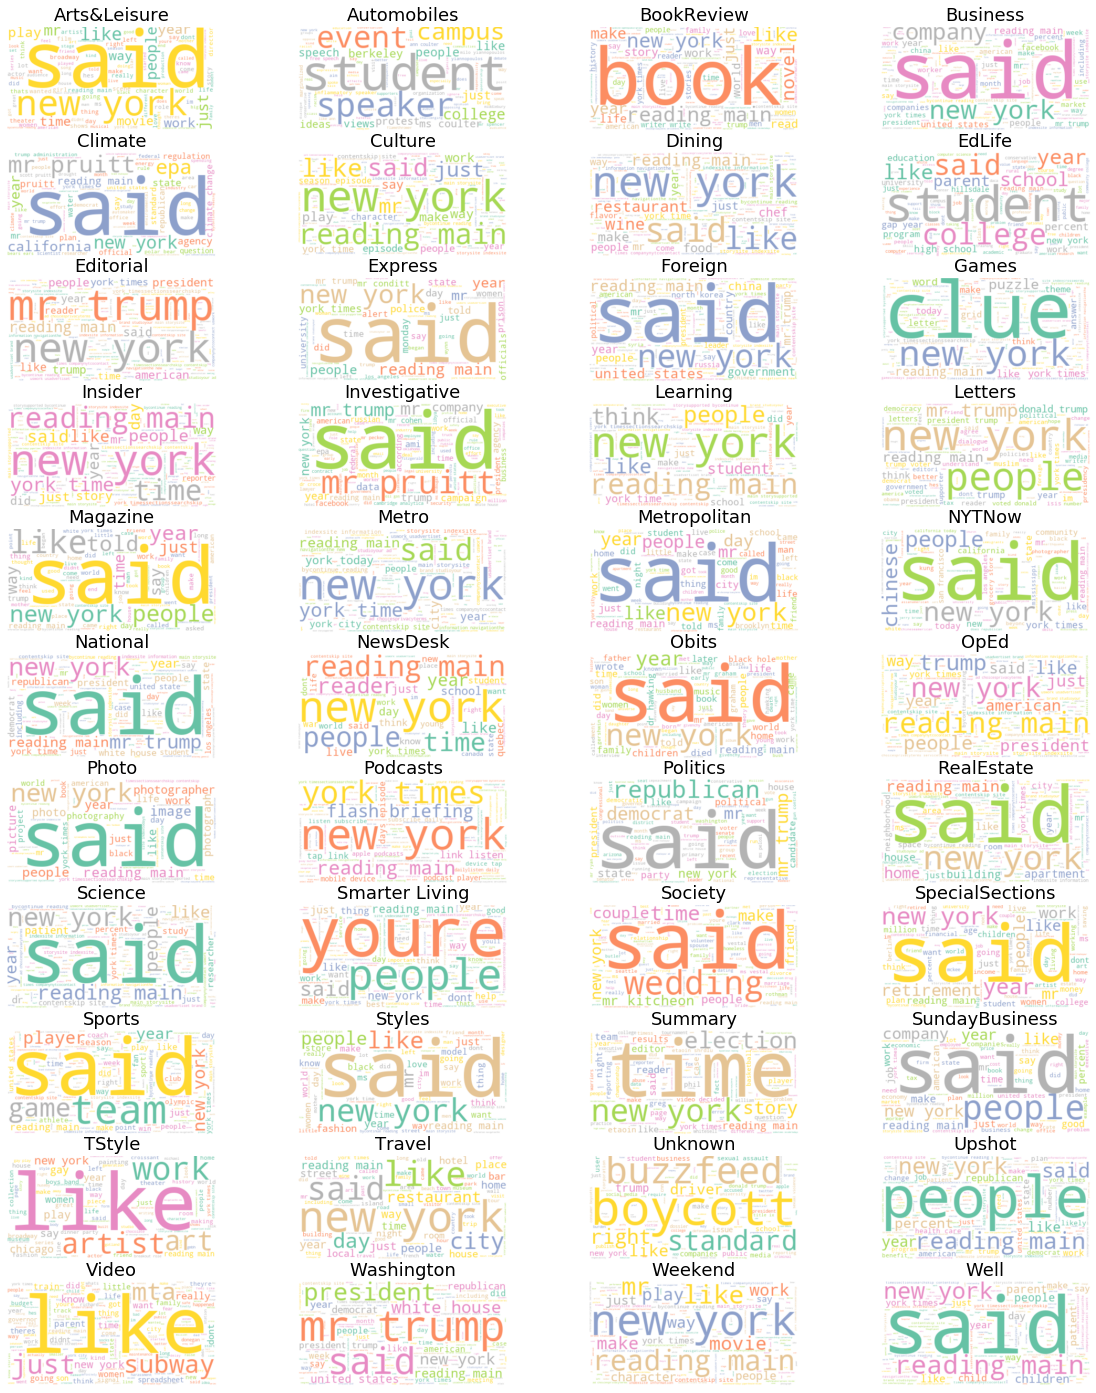

In [18]:
from sklearn.feature_extraction import text

stop_words = text.ENGLISH_STOP_WORDS
           
plt.rcParams['figure.figsize'] = [20, 25]

wc = WordCloud(stopwords=stop_words, background_color="white", 
               colormap="Set2", max_font_size=150, random_state=42)

for i in range(len(df_articles_newDesk)):
    wc.generate(df_articles_newDesk.text[i])
    plt.subplot(11, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(df_articles_newDesk.index[i], fontsize=18)

plt.show()

From the WordClouds, we can see that many popular common words include "said" and "like". However, since they add little insight, they are added to the stopword list. 

In [19]:
stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

### Document-Term Matrix with CountVectorizer
A document-term matrix is created using sklearn's feature extraction text submodule's CountVectorizer. Additional stop words are also added using a union and these stop words are specified in the CountVectorizer parameters. The document-term matrix is then converted to a DataFrame and transposed for further analysis. 

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# adding more words to stop_words for further insight
added_stop_words = ['like', 'said', 'just', 'youre', 'new', 'york', 'times']
stop_words = text.ENGLISH_STOP_WORDS.union(added_stop_words)

cv = CountVectorizer(stop_words=stop_words)
df_articles_newDesk_cv = cv.fit_transform(df_articles_newDesk.text)
df_articles_newDesk_dtm = pd.DataFrame(df_articles_newDesk_cv.toarray(), columns=cv.get_feature_names())
df_articles_newDesk_dtm.index = df_articles_newDesk.index
df_articles_newDesk_dtm

aa  aaa  aaalike  aaarated  aabar  aabc  aabowl  aacm  aah  \
newDesk                                                                       
Arts&Leisure      0    0        1         0      0     0       0     0    0   
Automobiles       0    0        0         0      0     0       0     0    0   
BookReview        3    0        0         0      0     0       0     0    0   
Business          1    0        0         0      0     0       0     0    0   
Climate           0    0        0         0      0     0       0     0    0   
Culture           1    3        0         0      0     0       0     3    0   
Dining            0    0        0         0      0     0       0     0    1   
EdLife            0    0        0         0      0     0       0     0    0   
Editorial         0    0        0         0      0     0       0     0    0   
Express           0    0        0         0      0     0       0     0    0   
Foreign           0    0        0         0      0     0       0     0    0   
Games             4    1        0         0      0     0       0     0    1   
Insider           1    0        0         0      0     0       0     0    0   
Investigative     0    0        0         0      0     0       0     0    0   
Learning          1    0        0         0      0     0       0     0    0   
Letters           0    0        0         0      0     0       0     0    0   
Magazine         22    0        0         0      1     1       1     0    0   
Metro             1    1        0         0      0     0       0     0    0   
Metropolitan      0    0        0         0      0     0       0     0    0   
NYTNow            0    0        0         0      0     0       0     0    0   
National          1    0        0         0      0     0       0     0    0   
NewsDesk          0    0        0         0      0     0       0     0    0   
Obits             0    0        0         0      0     0       0     0    0   
OpEd              2    1        0         1      0     0       0     0    1   
Photo             0    0        0         0      0     0       0     0    0   
Podcasts          0    0        0         0      0     0       0     0    0   
Politics          0    0        0         0      0     0       0     0    0   
RealEstate        0    0        0         0      0     0       0     0    0   
Science           1    0        0         0      0     0       0     0    0   
Smarter Living    0    0        0         0      0     0       0     0    0   
Society           0    0        0         0      0     0       0     0    0   
SpecialSections   0    0        0         0      0     0       0     0    0   
Sports            1    4        0         0      0     0       0     0    0   
Styles            0    0        0         0      0     0       0     0    0   
Summary           0    0        0         0      0     0       0     0    0   
SundayBusiness    0    0        0         0      0     0       0     0    0   
TStyle            1    0        0         0      0     0       0     0    0   
Travel            0    4        0         0      0     0       0     0    0   
Unknown           0    0        0         0      0     0       0     0    0   
Upshot            0    0        0         0      0     0       0     0    0   
Video             0    0        0         0      0     0       0     0    0   
Washington        0    0        0         0      0     0       0     0    1   
Weekend           2    0        0         0      0     0       0     0    0   
Well              0    1        0         0      0     0       0     0    0   

                 aahed  ...  zyuganov  zz  zzria  zzs  zzz  zzzghhffttt  zzzs  \
newDesk                 ...                                                     
Arts&Leisure         0  ...         0   4      0    0    0            0     0   
Automobiles          0  ...         0   0      0    0    0            0     0   
BookReview           0  ...         0   0      0    0    0

In [21]:
# transposing the dtm to make it easier to work with 

df_articles_newDesk_dtm_T = df_articles_newDesk_dtm.T
df_articles_newDesk_dtm_T

newDesk                Arts&Leisure  Automobiles  BookReview  Business  \
aa                                0            0           3         1   
aaa                               0            0           0         0   
aaalike                           1            0           0         0   
aaarated                          0            0           0         0   
aabar                             0            0           0         0   
...                             ...          ...         ...       ...   
zzzghhffttt                       0            0           0         0   
zzzs                              0            0           0         0   
zzzzhhdgggfjjjsds                 0            0           0         0   
zzzzhhdgggfjjjsdslets             0            0           0         0   
zzzzzanyhow                       0            0           0         0   

newDesk                Climate  Culture  Dining  EdLife  Editorial  Express  \
aa                           0        1       0       0          0        0   
aaa                          0        3       0       0          0        0   
aaalike                      0        0       0       0          0        0   
aaarated                     0        0       0       0          0        0   
aabar                        0        0       0       0          0        0   
...                        ...      ...     ...     ...        ...      ...   
zzzghhffttt                  0        0       0       0          0        0   
zzzs                         0        0       0       0          0        0   
zzzzhhdgggfjjjsds            0        0       0       0          0        0   
zzzzhhdgggfjjjsdslets        0        0       0       0          0        0   
zzzzzanyhow                  0        0       0       0          0        0   

newDesk                ...  Summary  SundayBusiness  TStyle  Travel  Unknown  \
aa                     ...        0               0       1       0        0   
aaa                    ...        0               0       0       4        0   
aaalike                ...        0               0       0       0        0   
aaarated               ...        0               0       0       0        0   
aabar                  ...        0               0       0       0        0   
...                    ...      ...             ...     ...     ...      ...   
zzzghhffttt            ...        0               0       0       1        0   
zzzs                   ...        0               0       0       2        0   
zzzzhhdgggfjjjsds      ...        0               0       0       1        0   
zzzzhhdgggfjjjsdslets  ...        0               0       0       1        0   
zzzzzanyhow            ...        0               0       0       0        0   

newDesk                Upshot  Video  Washington  Weekend  Well  
aa                          0      0           0        2     0  
aaa                         0      0           0        0     1  
aaalike                     0      0           0        0     0  
aaarated                    0      0           0        0     0  
aabar                       0      0           0        0     0  
...                       ...    ...         ...      ...   ...  
zzzghhffttt                 0      0           0        0     0  
zzzs                        0      0           0        0     0  
zzzzhhdgggfjjjsds           0      0           0        0     0  
zzzzhhdgggfjjjsdslets       0      0           0        0     0  
zzzzzanyhow                 0      0           0        0     0  

[323717 rows x 44 columns]

The following cell prints the 10 most common words in each desk of the New York Times. 

In [22]:
# printing the 10 most common words from each desk at NYT

for col in df_articles_newDesk_dtm_T.columns:
    top_10_words = df_articles_newDesk_dtm_T[col].sort_values(ascending=False).head(10).index
    top_10_string = ", ".join(top_10_words)
    print("From the {} desk, the top 10 most common words are: \n{}\n".format(col, top_10_string))

From the Arts&Leisure desk, the top 10 most common words are: 
mr, ms, people, time, years, reading, going, main, im, theater

From the Automobiles desk, the top 10 most common words are: 
students, speakers, campus, college, speech, event, coulter, yiannopoulos, mr, berkeley

From the BookReview desk, the top 10 most common words are: 
book, reading, main, books, novel, story, match, time, life, read

From the Business desk, the top 10 most common words are: 
mr, company, main, reading, people, trump, companies, united, states, percent

From the Climate desk, the top 10 most common words are: 
mr, pruitt, epa, climate, environmental, main, reading, bears, trump, agency

From the Culture desk, the top 10 most common words are: 
mr, reading, main, episode, ms, season, time, people, play, way

From the Dining desk, the top 10 most common words are: 
mr, food, main, reading, wine, cooking, restaurant, wines, chef, ms

From the EdLife desk, the top 10 most common words are: 
students, coll

### WordCloud of Each Desk
The following cell prints an updated WordCloud for each desk, excluding the stop words that we previously added with the union. 

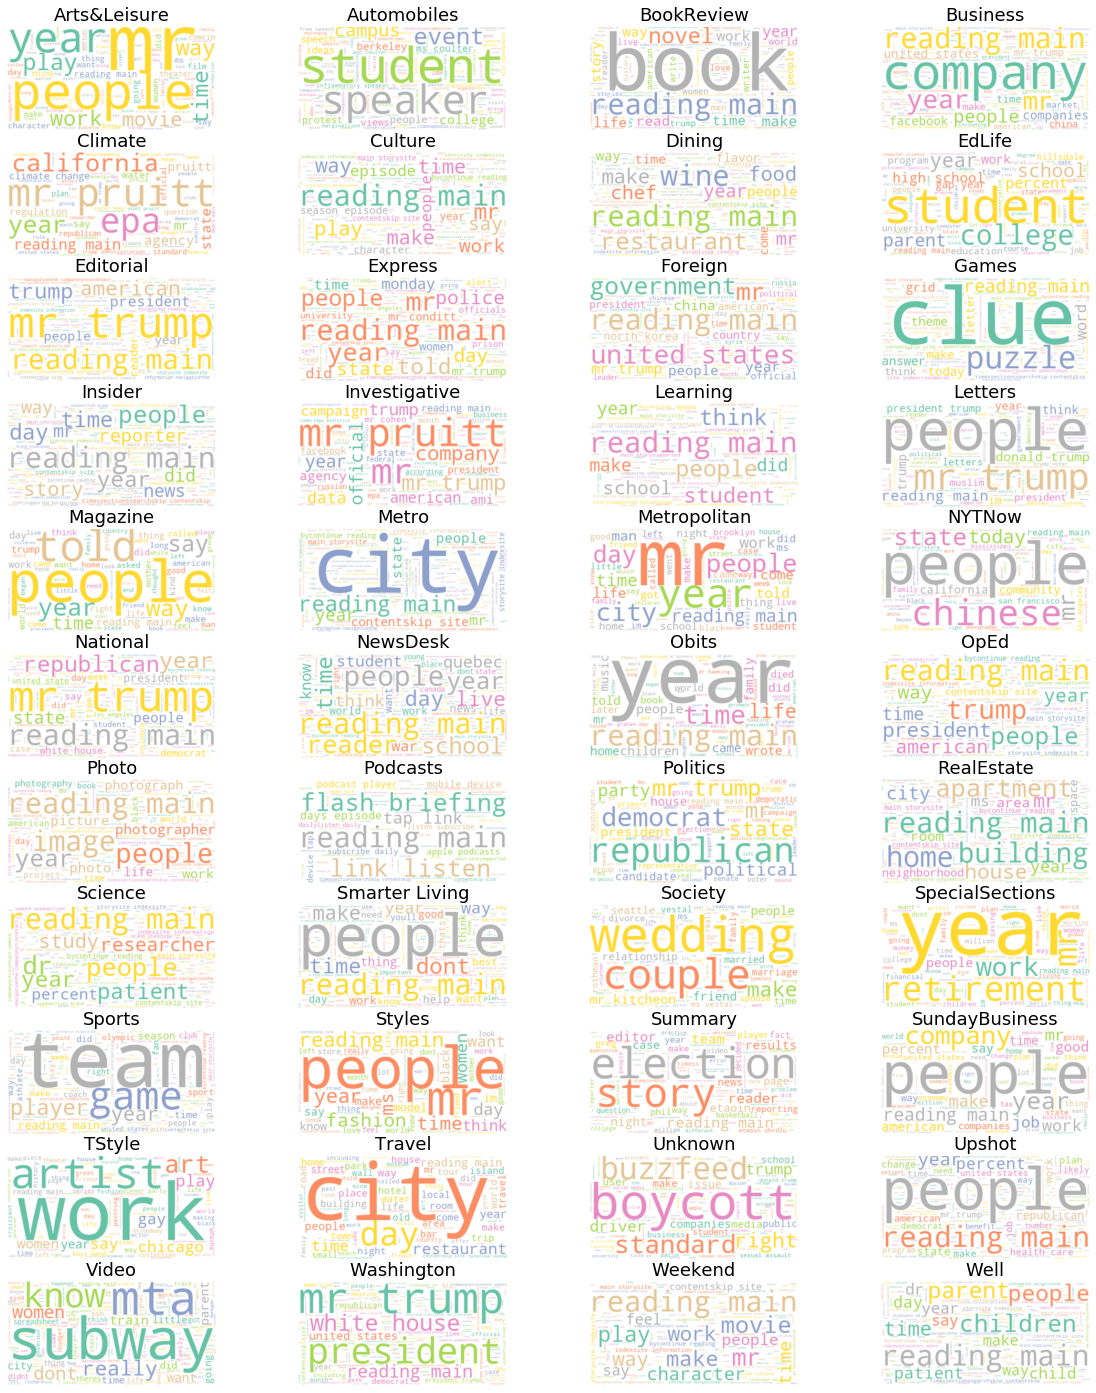

In [23]:
plt.rcParams['figure.figsize'] = [20, 25]

# stop_words contains the new stop words that we added
wc = WordCloud(stopwords=stop_words, background_color="white", 
               colormap="Set2", max_font_size=150, random_state=42)

for i in range(len(df_articles_newDesk)):
    wc.generate(df_articles_newDesk.text[i])
    plt.subplot(11, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(df_articles_newDesk.index[i], fontsize=18)

plt.show()

From these WordClouds, we can see that the textual data does, in fact, make sense. Under EdLife, or Education Life, we can see words like "student" and "college" and under Games we can see words like "clue" and "puzzle". This concludes our exploratory data analysis on the New York Times articles. 

## 1.2 EDA on Comments
Here we are performing the EDA on New York Times comments so that we get a good intution of the data before we use it for prediction. The comments sections for articles in the NYT are quite active and give insights to readers’ opinions on the subject matter of the articles.

**Importing libraries**

In [24]:
import matplotlib as mpl
import numpy as np
import os

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings 
warnings.filterwarnings('ignore')

**Next we import the dataframe containing all the comments on New York Times articles**

In [25]:
c1 = pd.read_csv("Data/CommentsJan2017.csv")
c2 = pd.read_csv("Data/CommentsFeb2017.csv")
c3 = pd.read_csv("Data/CommentsMarch2017.csv")
c4 = pd.read_csv("Data/CommentsApril2017.csv")
c5 = pd.read_csv("Data/CommentsMay2017.csv")

c6 = pd.read_csv("Data/CommentsJan2018.csv")
c7 = pd.read_csv("Data/CommentsFeb2018.csv")
c8 = pd.read_csv("Data/CommentsMarch2018.csv")
c9 = pd.read_csv("Data/CommentsApril2018.csv")

comments = pd.concat([c1, c2, c3, c4, c5, c6, c7, c8, c9])

In [26]:
comments.head()

approveDate                 articleID  articleWordCount  \
0   1483455908  58691a5795d0e039260788b9            1324.0   
1   1483455656  58691a5795d0e039260788b9            1324.0   
2   1483455655  58691a5795d0e039260788b9            1324.0   
3   1483455653  58691a5795d0e039260788b9            1324.0   
4   1483455216  58691a5795d0e039260788b9            1324.0   

                                         commentBody   commentID  \
0  For all you Americans out there --- still rejo...  20969730.0   
1  Obamas policies may prove to be the least of t...  20969325.0   
2  Democrats are comprised of malcontents who gen...  20969855.0   
3  The picture in this article is the face of con...  20969407.0   
4                       Elections have consequences.  20969274.0   

   commentSequence commentTitle commentType    createDate  depth  ...  \
0       20969730.0        <br/>     comment  1.483426e+09    1.0  ...   
1       20969325.0        <br/>     comment  1.483417e+09    1.0  ...   
2       20969855.0        <br/>     comment  1.483431e+09    1.0  ...   
3       20969407.0        <br/>     comment  1.483419e+09    1.0  ...   
4       20969274.0          NaN     comment  1.483417e+09    1.0  ...   

     status  timespeople trusted  typeOfMaterial  updateDate userDisplayName  \
0  approved          1.0     0.0            News  1483455908        N. Smith   
1  approved          1.0     0.0            News  1483455656     Kilocharlie   
2  approved          1.0     0.0            News  1483455655     Frank Fryer   
3  approved          1.0     0.0            News  1483455653     James Young   
4  approved          1.0     0.0            News  1483455216              M.   

       userID   userLocation  userTitle  userURL  
0  64679318.0  New York City        NaN      NaN  
1  69254188.0        Phoenix        NaN      NaN  
2  76788711.0        Florida        NaN      NaN  
3  72718862.0        Seattle        NaN      NaN  
4   7529267.0        Seattle        NaN      NaN  

[5 rows x 34 columns]

**We have 34 features and over 2 million rows**

In [27]:
comments.shape

(2176364, 34)

**The text of a random comment in the dataframe**

In [28]:
comments.commentBody.sample()

184619    Until last month I was a  voracious consumer o...
Name: commentBody, dtype: object

## 1.2.1 Data Cleaning

* Data cleaning is the process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted. 
* If the data is not clean, it is not very useful when it comes to analyzing the data because it may hinder the process or provide inaccurate results.

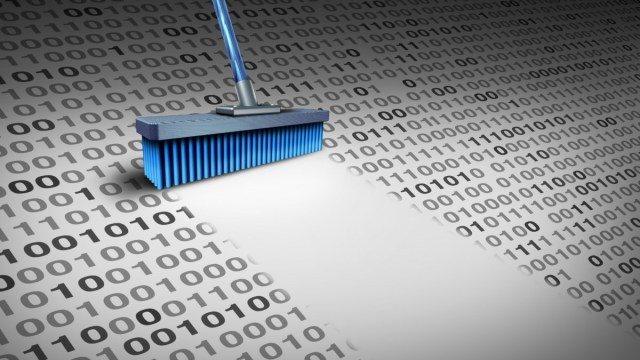

**We preprocess the text of the comments to remove certain irrelevant characters**

In [29]:
def dataclean(commentBody):
    commentBody = commentBody.str.replace("(<br/>)", "")
    commentBody = commentBody.str.replace('(<a).*(>).*(</a>)', '')
    commentBody = commentBody.str.replace('(&amp)', '')
    commentBody = commentBody.str.replace('(&gt)', '')
    commentBody = commentBody.str.replace('(&lt)', '')
    commentBody = commentBody.str.replace('(\xa0)', ' ')  
    return commentBody
comments.commentBody = dataclean(comments.commentBody)

**The feature commentTitle is not useful as it only contains <br/> and/or n/a values**

In [30]:
comments.commentTitle.value_counts()

<br/>    2099561
Name: commentTitle, dtype: int64

**Next we look into the missing values in each column**

In [31]:
comments.isnull().sum()

approveDate                    0
articleID                      0
articleWordCount               0
commentBody                    0
commentID                      0
commentSequence                0
commentTitle               76803
commentType                    0
createDate                     0
depth                          0
editorsSelection               0
inReplyTo                      0
newDesk                        0
parentID                       0
parentUserDisplayName    1596067
permID                        22
picURL                         0
printPage                      0
recommendations                0
recommendedFlag          2176364
replyCount                     0
reportAbuseFlag          2176364
sectionName               149613
sharing                        0
status                         0
timespeople                    0
trusted                        0
typeOfMaterial                 0
updateDate                     0
userDisplayName              677
userID    

**We drop commentTitle along with the columns that contain only null values, as seen by the info() function above**

In [32]:
comments.drop(['commentTitle', 'recommendedFlag', 'reportAbuseFlag', 'userURL'], axis=1, inplace=True)

In [33]:
comments.shape

(2176364, 30)

**Filling userTitle with Null values as unknown**

In [34]:
comments.userTitle.fillna('Unknown', inplace=True)
comments.userTitle.value_counts()

Unknown                                            2176039
Your Money columnist                                    60
The Learning Network                                    52
editor, Wordplay                                        47
New Old Age columnist                                   34
Columnist                                               30
The New York Times                                      16
Reporter                                                11
Editorial Director, Reader Center                        6
Staff editor and author of this piece                    6
Reporter, New York Times                                 5
Senior Staff Editor, The New York Times                  4
Senior Staff Editor                                      4
Staff Editor, The New York Times                         4
senior staff editor                                      3
Columnist, New York Today                                3
NYT Video                                               

## 1.2.2 Visualization 
### Understanding the distribution of upvotes on comments and removing outliers 

 Each comment can receive other readers’ recommendations in the form of upvotes.

**The following graph shows that the distribution of upvotes on the comments is highly skewed to the right. So, the mean of the number upvotes on comments is significantly higher than the median.**

Text(0.5, 1.0, 'Distribution of upvotes (recommendations) on comments')

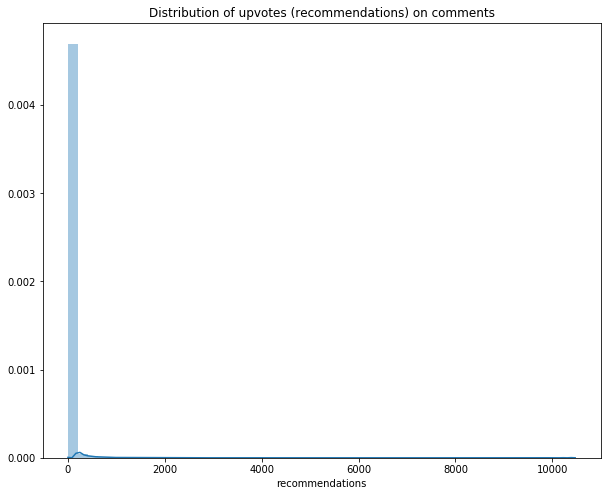

In [35]:
plt.figure(figsize=(10,8))
sns.distplot(comments.recommendations);
plt.title("Distribution of upvotes (recommendations) on comments")

**Function to print largest and smallest values**

This function returns the largest value and is called to get the highest number of upvotes in the cell below

In [36]:
# We write the two functions that are used often:
def largest(s, n=5):
    s = sorted(s.unique())
    for v in s[-1:-(n+1):-1]:
        print(v)
    print()

**The top 5 highest number of upvotes are all above 4000 and they can be considered as outliers.**

In [37]:
print("Top 5 highest number of on comments: ")
largest(comments.recommendations)

Top 5 highest number of on comments: 
10472.0
9279.0
8713.0
8639.0
8514.0



**99% of comments have 283 or fewer upvotes and 90% of comments have 58 or fewer upvotes. That is the reason for the highly skewed graph above**

In [38]:
comments.recommendations.quantile(0.99), comments.recommendations.quantile(0.95)

(331.0, 59.0)

**Keeping outliers in our dataframe will give misleading averages for the exploratory data analysis. So here we first discard them by restricting the number of upvotes to 2000.**

In [39]:
comments[comments.recommendations > 2000].shape[0]

1031

**There are 105630 such comments in total that we are discarding.**

In [40]:
comments = comments[comments.recommendations <= 2000]

**We plot the distribution of upvotes for the comments after removing the ouliers**

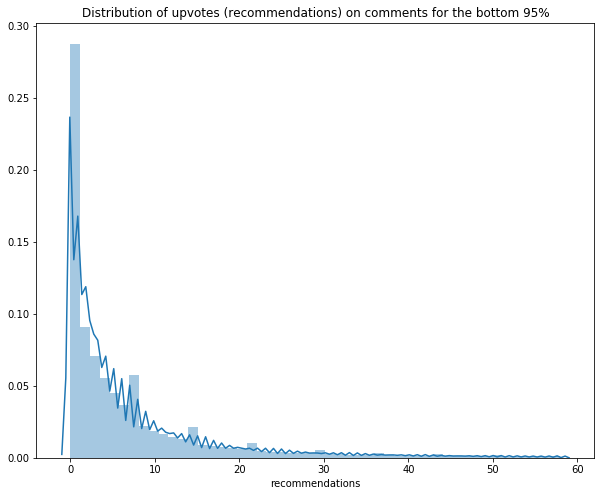

In [41]:
plt.figure(figsize=(10,8))
sns.distplot(comments.loc[comments.recommendations<=comments.recommendations.quantile(0.95), 'recommendations']);
plt.title("Distribution of upvotes (recommendations) on comments for the bottom 95%");

### Features related to replies to comments

### Types of comments:
**There are three types of comments - usual comments, replies made to other comments/replies and reporter's replies to a comment/reply.**

In [42]:
comments.commentType.value_counts()

comment          1594729
userReply         580279
reporterReply        325
Name: commentType, dtype: int64

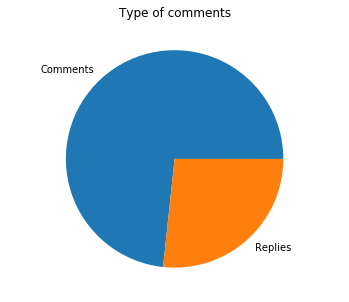

In [43]:
mpl.rcParams['figure.figsize'] = (6, 5)
mpl.rcParams['axes.titlesize'] = 'large'
mpl.rcParams['axes.labelsize'] = 'medium'
plt.axis('equal')
plt.pie(comments.commentType.value_counts(), labels=('Comments', "Replies", "")); 
plt.title('Type of comments');

**As we can see, the maximum number of comments which are selected as NYT's pick have a reporters reply in the comments section**

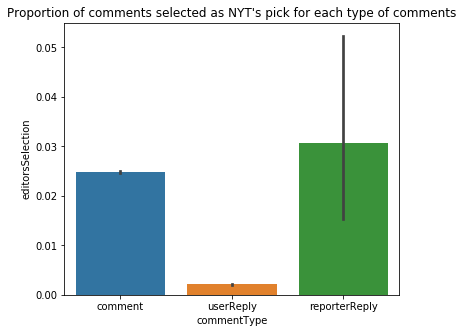

In [44]:
sns.barplot(x='commentType', y='editorsSelection', data=comments);
plt.title("Proportion of comments selected as NYT's pick for each type of comments");

## 1.2.3 Analysis
### Analysing Depth of a comment

**The depth of 2 would mean that the comment was posted as a reply to another comment whereas a depth of 3 would mean that comment was in reply to a comment that was itself a reply. Most of the comments have a depth of 1 as shown below**

In [45]:
comments.depth.value_counts()

1.0    1594735
2.0     572458
3.0       8005
4.0        118
5.0         17
Name: depth, dtype: int64

**The comments that were replies have significantly less upvotes on average than the original comments. Similarly, the nested comments have the least average number of upvotes.**

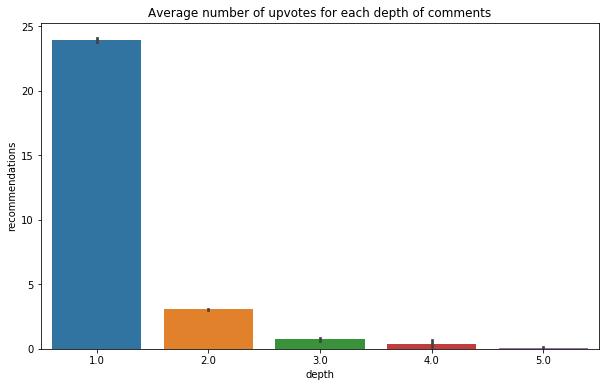

In [46]:
mpl.rcParams['figure.figsize'] = (10, 6)
sns.barplot(x='depth', y='recommendations', data=comments);
plt.title("Average number of upvotes for each depth of comments");

### Analyzing both the features, depth and commentType in terms of number of upvotes and editor's pick

**We can see that the comments with more depth have more number of upvotes and also have a reporters reply**

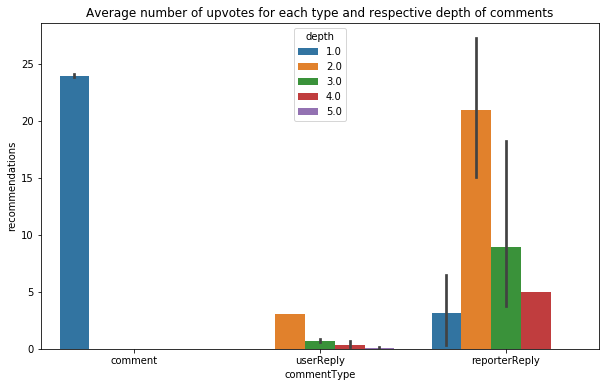

In [47]:
sns.barplot(x='commentType', y='recommendations', hue='depth', data=comments);
plt.title("Average number of upvotes for each type and respective depth of comments");

### Word clouds from NYT comments dataset

**To get a glimpse of the textual features in the data, we plot the most frequent words using word clouds**

**We define a function plot_wordcloud that generates the word clouds of custom shapes. The argument mask is used to pass on images of high definitions that are used in the generation of word clouds**

In [30]:
def word_cloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):

    wc = WordCloud(background_color='white',
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wc.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wc);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

**Most common words in all of the comments**

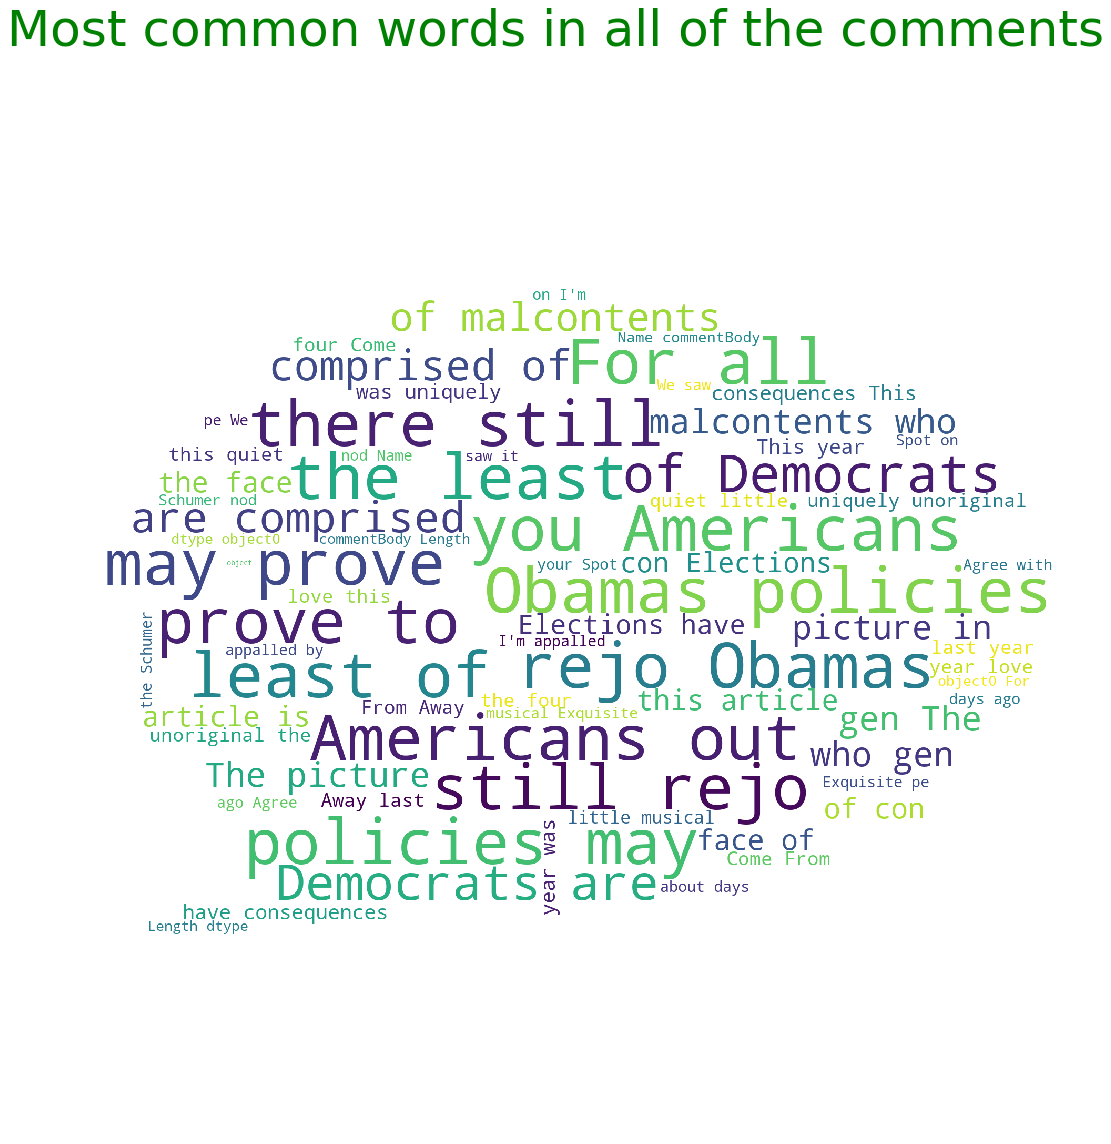

In [31]:
comments_text = str(comments.commentBody)*100000
comments_mask = np.array(Image.open('Data/masks-wordclouds/comment.png'))
word_cloud(comments_text, comments_mask, max_words=400, max_font_size=120, 
               title = 'Most common words in all of the comments', title_size=50)

**Most common words in the top 1% most upvoted comments**

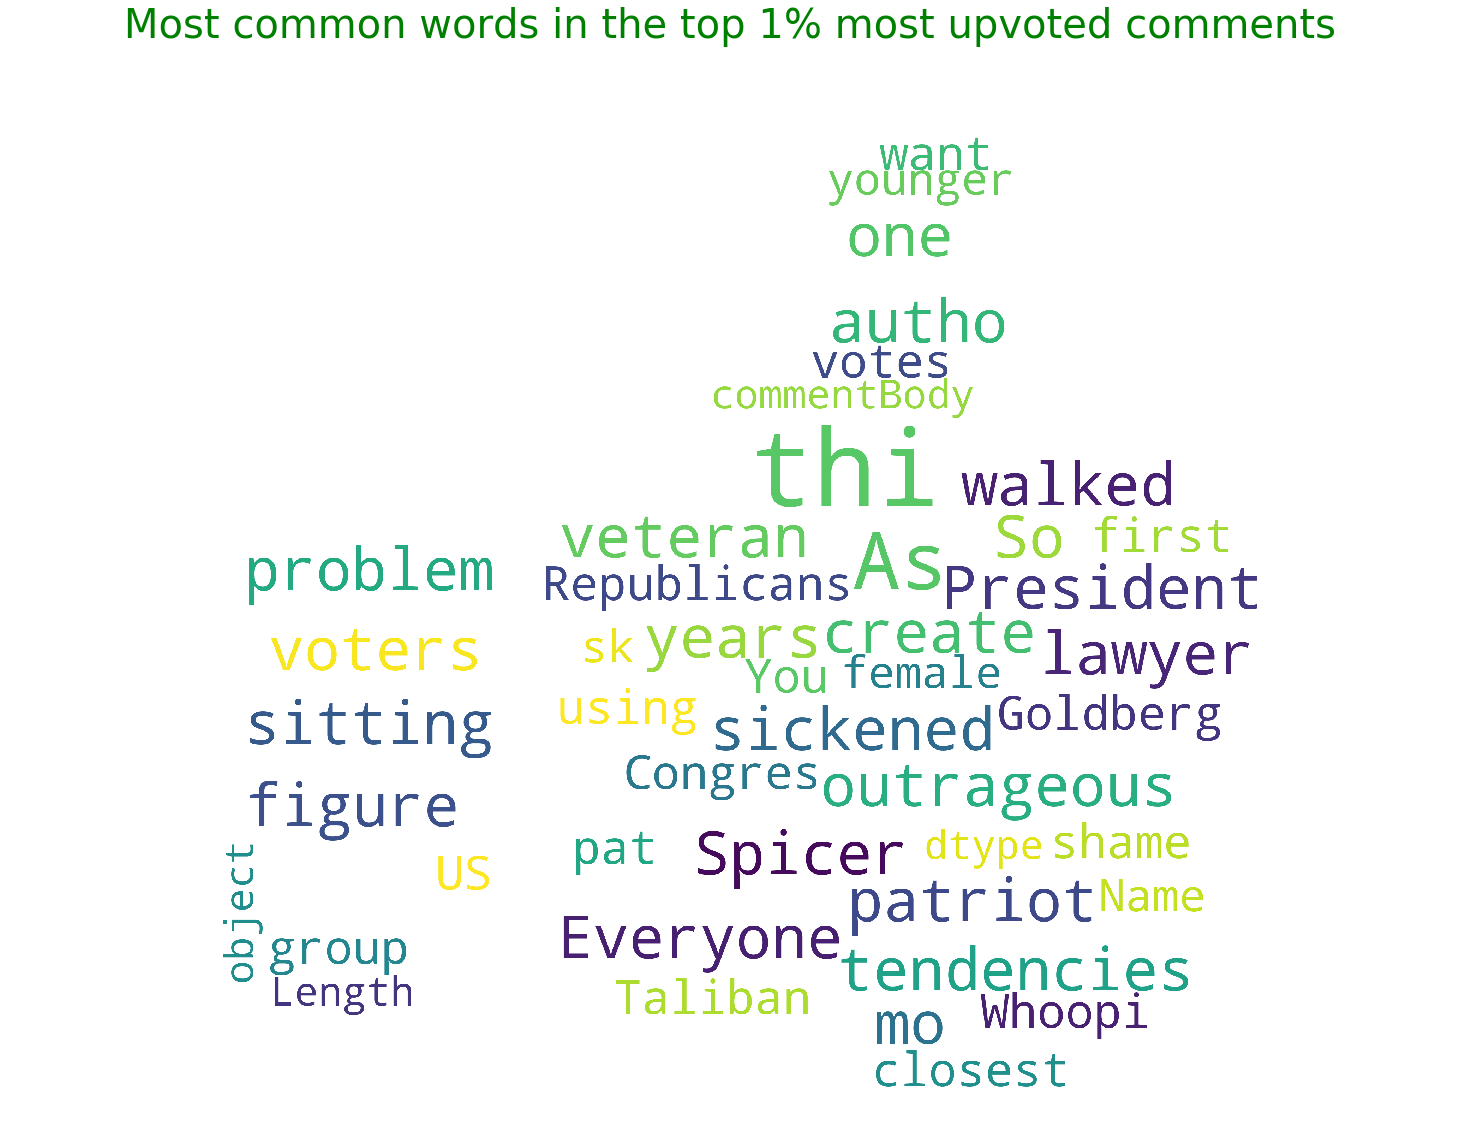

In [32]:
n = round(comments.shape[0]*0.01)*100000
top_recommended_comments_text = str(comments.nlargest(n, columns='recommendations').commentBody)
upvote_mask = np.array(Image.open('Data/masks-wordclouds/upvote.png'))
word_cloud(top_recommended_comments_text, upvote_mask, max_words=300000, max_font_size=300,
               title = 'Most common words in the top 1% most upvoted comments')

**Most common words in the comments selected as Editor`s pick**

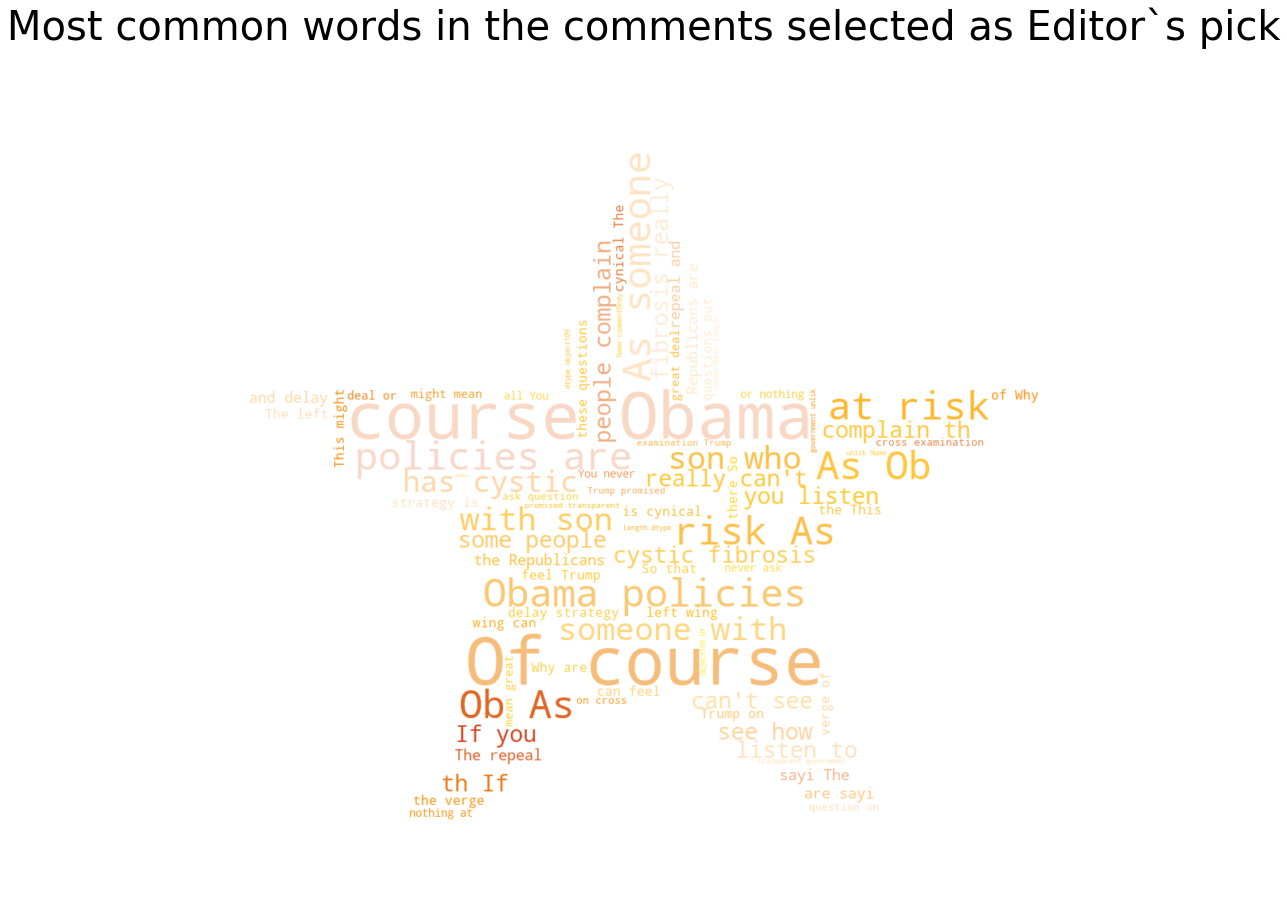

In [33]:
editorsPick_comments_text = str(comments.loc[comments.editorsSelection==1, 'commentBody'])*100000
star_mask = np.array(Image.open('Data/masks-wordclouds/star.png'))
word_cloud(editorsPick_comments_text, star_mask, max_words=8000, max_font_size=120, figure_size=(16,14),
               title = 'Most common words in the comments selected as Editor`s pick', image_color=True)

**Most common locations of the commenters**

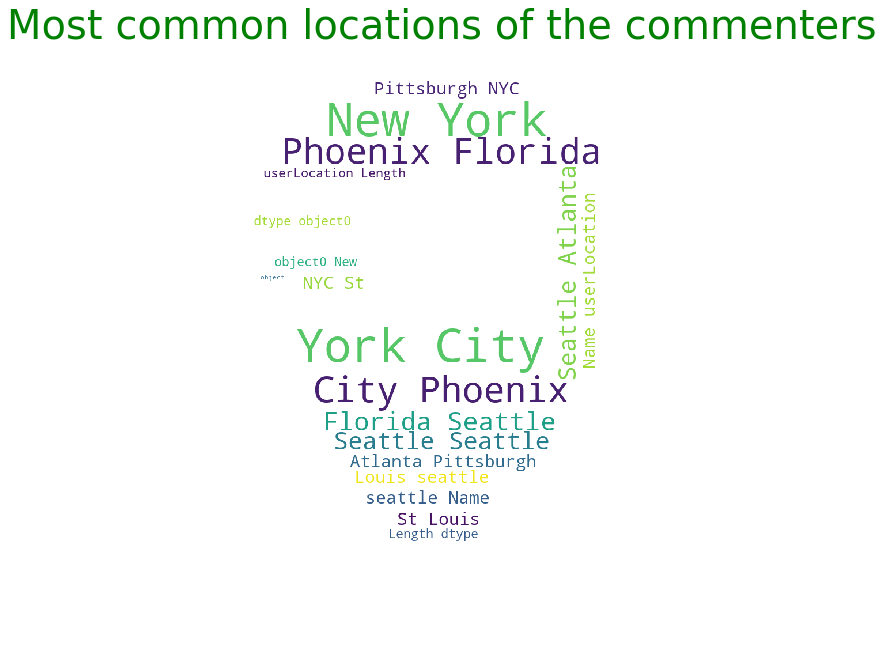

In [35]:
userLocations = str(comments.userLocation)*100000
loc_mask = np.array(Image.open('Data/masks-wordclouds/loc.png'))
word_cloud(userLocations, loc_mask, max_words=400, max_font_size=80, figure_size=(11,16),
               title = 'Most common locations of the commenters')